In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer

In [34]:
df = pd.read_csv('car_details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [35]:
df.shape

(4340, 8)

In [36]:
def verificar_colunas_com_unico_valor(dataframe):
    colunas_unico_valor = []
    for coluna in dataframe.columns:
        if dataframe[coluna].nunique() == 1:
            colunas_unico_valor.append(coluna)
    return colunas_unico_valor

# Aplicar a função e imprimir o resultado
colunas_com_unico_valor = verificar_colunas_com_unico_valor(df)
print("Colunas com um único valor:", colunas_com_unico_valor)

Colunas com um único valor: []


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [38]:
df1 = df.copy()

In [39]:
df1['brand'] = df1['name'].str.split().str[0]

In [40]:
df1.drop('name', axis=1, inplace=True)

In [41]:
# Reordenar as colunas colocando "brand" em primeiro lugar
cols = ['brand'] + [col for col in df1.columns if col != 'brand']
df1 = df1[cols]

In [42]:
df1.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


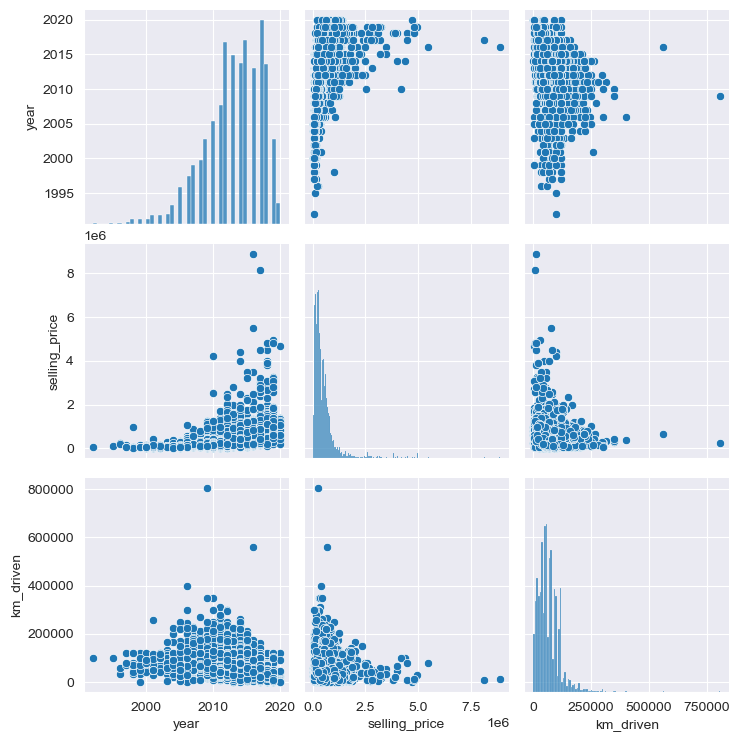

In [43]:
numeric_features = ['year', 'selling_price', 'km_driven',]
sns.pairplot(df1[numeric_features])
plt.show()

In [44]:
df1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


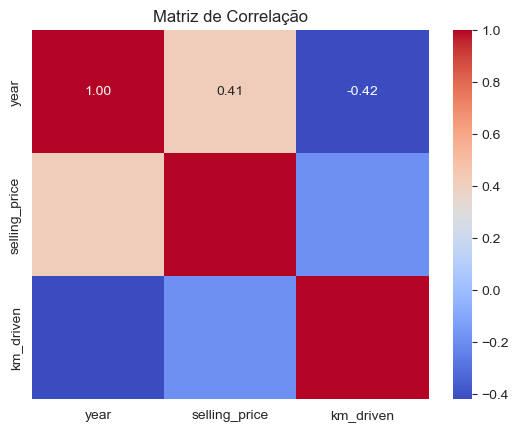

In [45]:
correlation_matrix = df1[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [46]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

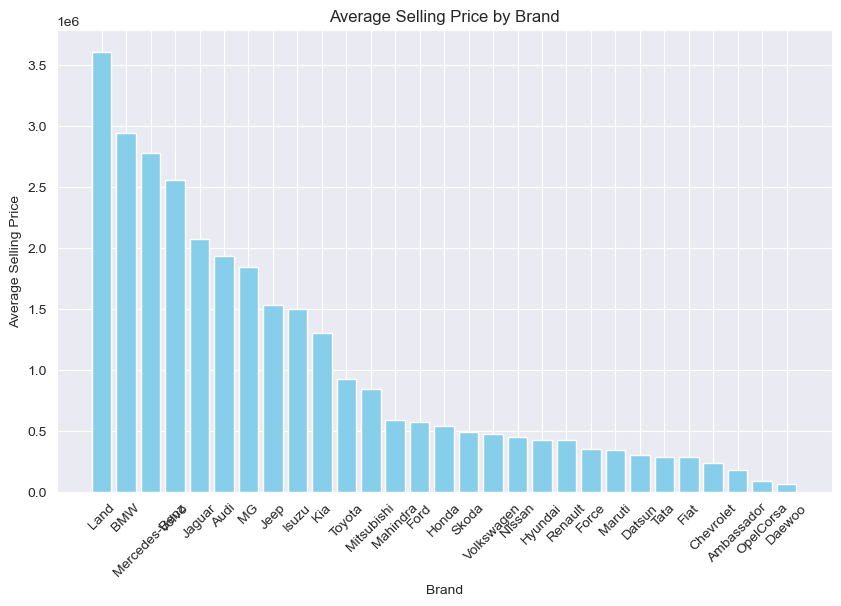

In [47]:
average_price_by_brand = df1.groupby('brand')['selling_price'].mean().reset_index()
average_price_by_brand = average_price_by_brand.sort_values(by='selling_price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_price_by_brand['brand'], average_price_by_brand['selling_price'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()



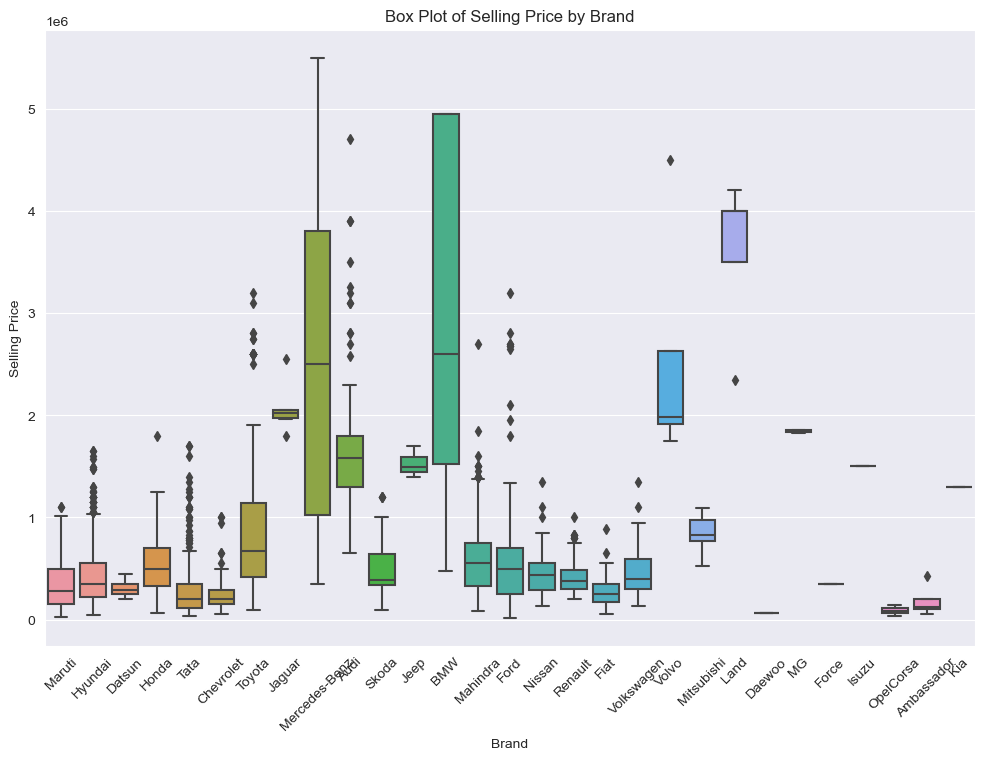

In [48]:
df1_filtered = df1[df1['selling_price'] < 6000000]
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='selling_price', data=df1_filtered)
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()


In [98]:
max_year = df1_filtered['year'].max()
df1_filtered['age'] = max_year - df1_filtered['year']


/var/folders/dx/d9ms5mjj3_n16hrjpzrt4m9c0000gn/T/ipykernel_47555/2597060341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['age'] = max_year - df1_filtered['year']


In [99]:
df1_filtered.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [101]:
df1_encoded = pd.get_dummies(df1_filtered, columns=['brand', 'fuel', 'seller_type', 'transmission'])

In [102]:
df1_encoded.head()

,year,selling_price,km_driven,owner,age,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,2007,135000,50000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2012,600000,100000,First Owner,8,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,2017,250000,46000,First Owner,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,2014,450000,141000,Second Owner,6,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [103]:
df1_encoded.head()

,year,selling_price,km_driven,owner,age,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,2007,135000,50000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2012,600000,100000,First Owner,8,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,2017,250000,46000,First Owner,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,2014,450000,141000,Second Owner,6,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [54]:
# Criar um dicionário para mapear os valores
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Aplicar o mapeamento à coluna 'owner'
df1_encoded['owner_encoded'] = df1_encoded['owner'].map(owner_mapping)

# Agrupar por 'owner' e 'owner_encoded' e contar o número de linhas em cada grupo
owner_counts = df1_encoded.groupby(['owner', 'owner_encoded']).size().reset_index(name='counts')
owner_counts

,owner,owner_encoded,counts
0,First Owner,1,2832
1,Fourth & Above Owner,4,81
2,Second Owner,2,1106
3,Test Drive Car,5,17
4,Third Owner,3,304


In [104]:
df_model = df1_encoded.copy()

In [105]:
columns_to_drop = [col for col in ['year', 'owner'] if col in df_model.columns]

# Remover as colunas existentes
df_model.drop(columns_to_drop, axis=1, inplace=True)
df_model.head()


,selling_price,km_driven,age,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,60000,70000,13,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,135000,50000,13,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,600000,100000,8,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,250000,46000,3,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,True
4,450000,141000,6,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [106]:
# Definir a variável dependente (target)
Y = df_model['selling_price']

# Definir as variáveis independentes
X = df_model.drop('selling_price', axis=1)

# Exibir as primeiras linhas para verificar o resultado
print("Variáveis independentes (X):")
print(X.head())
print("\nVariável dependente (Y):")
print(Y.head())

Variáveis independentes (X):
   km_driven  age  brand_Ambassador  brand_Audi  brand_BMW  brand_Chevrolet  \
0      70000   13             False       False      False            False   
1      50000   13             False       False      False            False   
2     100000    8             False       False      False            False   
3      46000    3             False       False      False            False   
4     141000    6             False       False      False            False   

   brand_Daewoo  brand_Datsun  brand_Fiat  brand_Force  ...  fuel_CNG  \
0         False         False       False        False  ...     False   
1         False         False       False        False  ...     False   
2         False         False       False        False  ...     False   
3         False          True       False        False  ...     False   
4         False         False       False        False  ...     False   

   fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  sel

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [108]:
scaler = StandardScaler()
# Ajustar o scaler apenas nos dados de treino e transformar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar os dados de teste usando o mesmo scaler ajustado nos dados de treino
X_test_scaled = scaler.transform(X_test)

In [109]:
# Treinar e avaliar modelos

# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_train_scaled)
lr_r2_train = r2_score(y_train, y_pred_lr)
lr_mse_train = mean_squared_error(y_train, y_pred_lr)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_r2_test = r2_score(y_test, y_pred_lr)
lr_mse_test = mean_squared_error(y_test, y_pred_lr)

In [110]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_train_scaled)
rf_r2_train = r2_score(y_train, y_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_pred_rf)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_r2_test = r2_score(y_test, y_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_pred_rf)

In [111]:
# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_train_scaled)
xgb_r2_train = r2_score(y_train, y_pred_xgb)
xgb_mse_train = mean_squared_error(y_train, y_pred_xgb)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_r2_test = r2_score(y_test, y_pred_xgb)
xgb_mse_test = mean_squared_error(y_test, y_pred_xgb)

In [112]:
# Exibir os resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Train R²': [lr_r2_train, rf_r2_train, xgb_r2_train],
    'Test R²': [lr_r2_test, rf_r2_test, xgb_r2_test],
    'Train MSE': [lr_mse_train, rf_mse_train, xgb_mse_train],
    'Test MSE': [lr_mse_test, rf_mse_test, xgb_mse_test]
})

print(results)

               Model  Train R²  Test R²      Train MSE        Test MSE
0  Linear Regression      0.70     0.73 83060946438.16 107190315521.68
1      Random Forest      0.97     0.83  9786842625.20  66329163153.22
2            XGBoost      0.96     0.84 11907533983.32  65610753482.50


In [113]:


# Definir o modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir os parâmetros para o Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [10,15],
    'min_samples_leaf': [10, 15]
}

# Definir o Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring=make_scorer(mean_squared_error, greater_is_better=False), 
                           cv=5, n_jobs=-1, verbose=2)

# Ajustar o Grid Search aos dados de treino
grid_search.fit(X_train_scaled, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_rf_model = grid_search.best_estimator_
y_pred_train = best_rf_model.predict(X_train_scaled)
y_pred_test = best_rf_model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("\nResultados no Conjunto de Treino:")
print(f"R²: {train_r2}")
print(f"MSE: {train_mse}")

print("\nResultados no Conjunto de Teste:")
print(f"R²: {test_r2}")
print(f"MSE: {test_mse}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}

Resultados no Conjunto de Treino:
R²: 0.7192497629435963
MSE: 78934536124.43672

Resultados no Conjunto de Teste:
R²: 0.6964603012928153
MSE: 121118456442.79483


In [114]:
# Supondo que df1 é o dataframe original e X_test_scaled são os dados de teste
# Índices dos dados de teste
test_indices = X_test.index

# Fazer previsões no conjunto de teste
y_pred_test = best_rf_model.predict(X_test_scaled)

# Selecionar as linhas correspondentes no dataframe original
df_test = df1.loc[test_indices].copy()

# Adicionar uma coluna com os preços preditos
df_test['predicted_price'] = y_pred_test

# Desativar notação científica para a coluna 'predicted_price'
pd.options.display.float_format = '{:.2f}'.format

# Exibir as primeiras linhas do dataframe com as previsões
df_test.head(20)

# Opcional: restaurar a configuração padrão de exibição de floats
# pd.reset_option('display.float_format')


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,predicted_price
1906,Maruti,2015,455000,92621,Diesel,Dealer,Manual,First Owner,5,548187.78
1751,Mahindra,2016,470000,31367,Diesel,Dealer,Manual,First Owner,4,591947.62
386,Maruti,2017,600000,90000,Diesel,Individual,Manual,First Owner,3,706013.44
2115,Ford,2017,650000,6000,Petrol,Individual,Manual,First Owner,3,533804.65
3994,Tata,2010,75000,300000,Petrol,Individual,Manual,Third Owner,10,210279.15
735,Maruti,2013,325000,60000,Diesel,Individual,Manual,First Owner,7,326365.16
2165,Maruti,2014,390000,90000,Diesel,Individual,Manual,First Owner,6,535398.59
551,BMW,2016,2150000,43000,Diesel,Dealer,Automatic,First Owner,4,2237732.90
478,Volkswagen,2011,300000,65000,Diesel,Individual,Manual,Second Owner,9,258181.33
1170,Mahindra,2018,550000,44000,Diesel,Individual,Manual,First Owner,2,807773.00


In [ ]:
## dividir em treino e teste, normaliza e treina o modelo linear, treina algortimos de regressao. 
## Identificar overffiting
## ajustar hiperpametros para evitar overfitting

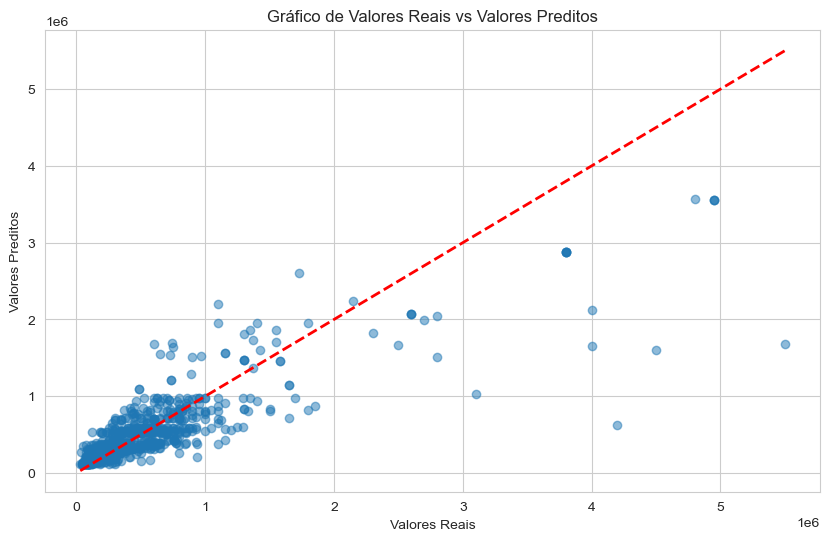

In [115]:
# Supondo que y_test contém os valores reais e y_pred_test contém os valores preditos

# Criar um gráfico de dispersão para valores reais vs valores preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Valores Reais vs Valores Preditos')
plt.show()